# Z-Score Normalized PSTH Heatmap Analysis (Digital Input Version)

This notebook creates Z-score normalized heatmaps that combine PSTH data from multiple units using **digitalin.dat** files instead of CSV files for interval data.

- **Y-axis**: Units (sorted in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Z-score normalized firing rate (standard deviations from unit mean)

## Digital Input Configuration
- **digitalin.dat**: Binary file containing 16-channel TTL data at 30kHz sampling rate
- **Channel 0**: Pico intervals (default)
- **Channel 1**: Time markers (optional)

The system automatically extracts TTL events from the specified channel and creates interval timing data compatible with the existing PSTH analysis pipeline.

## Z-Score Normalization Formula
**z = (x - u) / o**
- **z** = z-score
- **x** = one bin's value (frequency)
- **u** = mean of all bins for the same unit
- **o** = standard deviation from mean of all bins from the same unit

This normalization allows for better comparison across units with different baseline firing rates.

## Parameters
Configure the analysis parameters in the cell below and run the analysis.

In [60]:
# Import required modules
import sys
import os
sys.path.append('.')

# Force reload of the module to pick up new changes
import importlib
if 'normalized' in sys.modules:
    importlib.reload(sys.modules['normalized'])

import normalized
from normalized import (
    create_multiple_duration_normalized_heatmaps,
    analyze_units_by_max_zscore
)
import matplotlib.pyplot as plt


In [ ]:
# Configuration Parameters

# Data files (adjust paths as needed)
spikes_file = '../../../Data/040425/spikes.csv'
digitalin_file = '../../../Data/040425/digitalin.dat'  # Changed from CSV to DAT file
spikes_path = os.path.abspath(spikes_file)
digitalin_path = os.path.abspath(digitalin_file)

# Digital input parameters
sampling_rate = 30000         # Sampling rate in Hz
pico_channel = 0              # Channel for pico intervals (0-15)

# Analysis parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms)
units = None                      # Units to include (None = all units)
bin_size_ms = 0.1               # Bin size in milliseconds
pre_interval_ms = 5               # Time before interval start (ms)
post_interval_ms = 10             # Time after interval END (ms)
smooth_window = 10                 # Smoothing window (bins)

# Whisking exclusion parameters
exclude_whisking = True          # Set to True to exclude intervals overlapping with whisking
whisking_file = '../../../Data/040425/whisking_video_time.csv'  # Path to whisking.csv file (if it exists)
# Note: whisking.csv should contain 'Start' and 'End' columns with interval times to exclude

# Output settings
save_plots = True
output_dir = '../../../Output/040425/normalized_heatmaps_digitalin_exclude_whisking'


--- Processing normalized heatmap for duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/040425/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45)]
Available interval durations (first 5): ['4.93ms', '5.00ms', '5.07ms', '5.13ms', '5.47ms']
Found

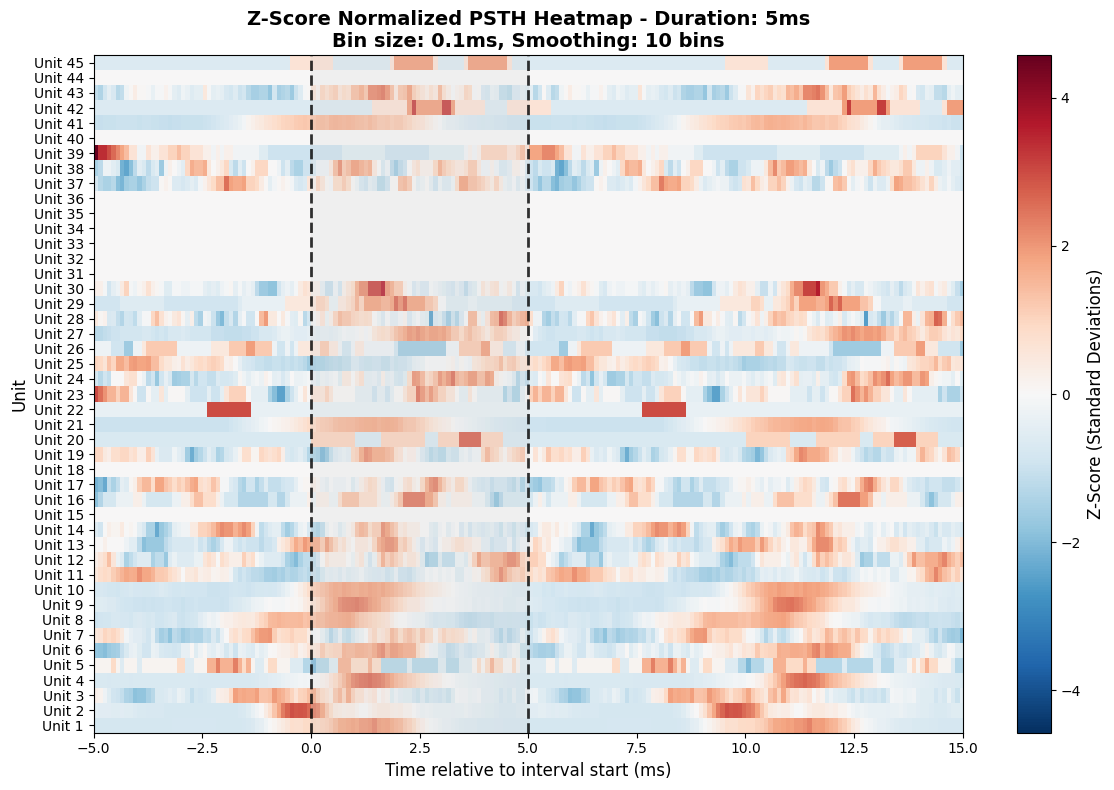

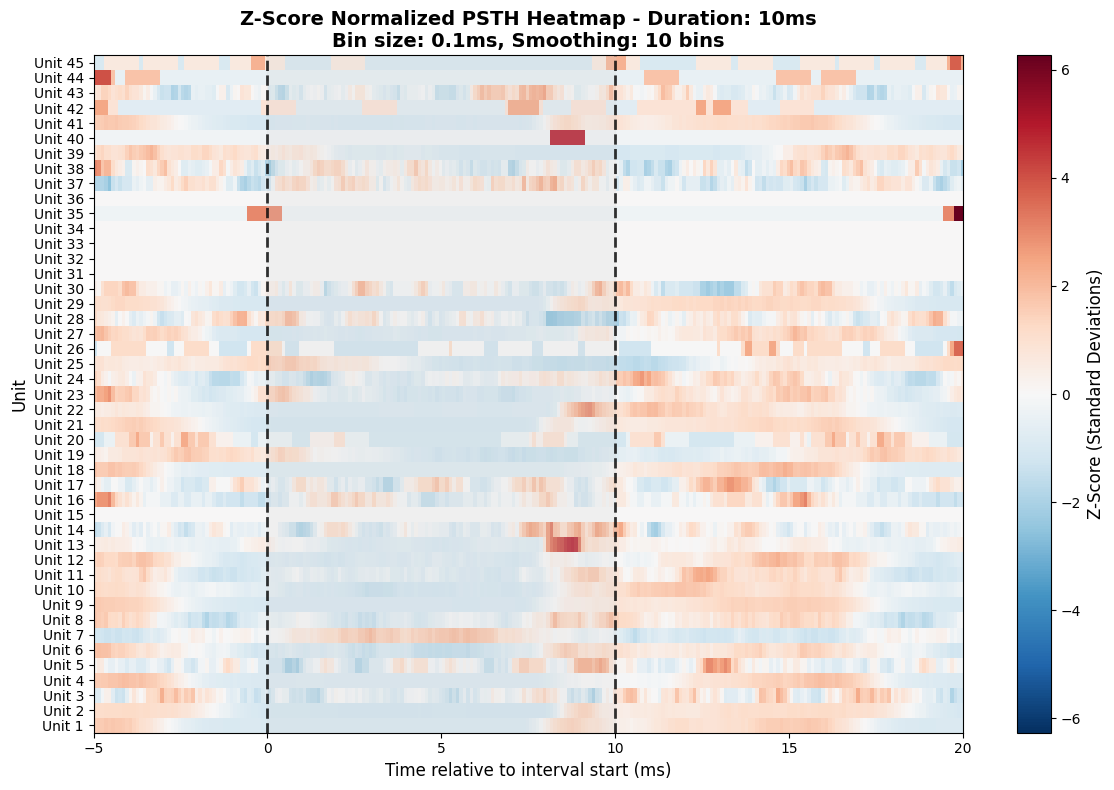

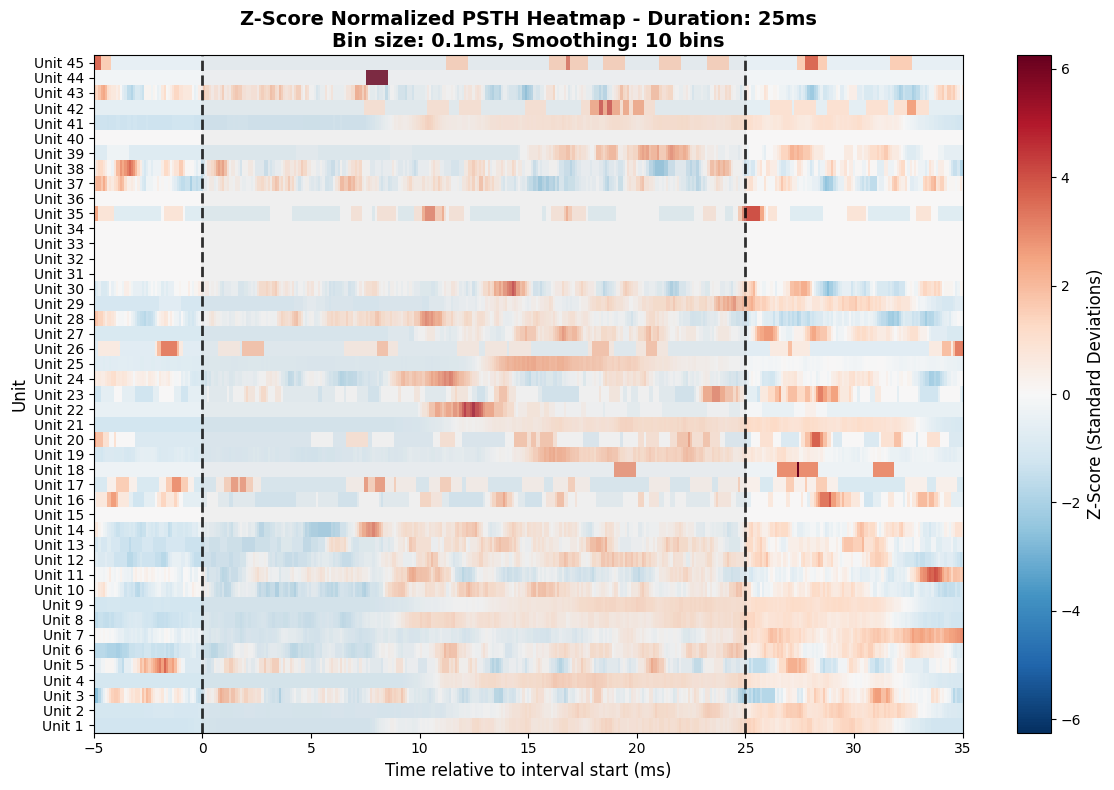

In [ ]:
# Create Z-Score Normalized PSTH heatmaps for all specified durations

save_dir = output_dir if save_plots else None

results = create_multiple_duration_normalized_heatmaps(
    spikes_file=spikes_path,
    digitalin_file=digitalin_path,  # Changed from intervals_file to digitalin_file
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    exclude_whisking=exclude_whisking,
    whisking_file=whisking_file if exclude_whisking else None,
    save_dir=save_dir,
    sampling_rate=sampling_rate,    # Added digitalin-specific parameters
    pico_channel=pico_channel
)

# Show the plots
plt.show()

In [25]:
# Analyze units by their highest maximum z-score values
unit_rankings = analyze_units_by_max_zscore(results, display_results=True)


=== Duration: 5ms ===
Units ordered by highest maximum z-score (positive direction):
Rank	Unit	Max Z-Score
------------------------------
 1	Unit 22	   2.500
 2	Unit 30	   2.227
 3	Unit 19	   2.218
 4	Unit 14	   2.117
 5	Unit 28	   2.099
 6	Unit 37	   2.062
 7	Unit 45	   2.030
 8	Unit 17	   2.005
 9	Unit 13	   1.951
10	Unit 16	   1.935
11	Unit 43	   1.913
12	Unit 20	   1.875
13	Unit 12	   1.854
14	Unit  7	   1.847
15	Unit 39	   1.797
16	Unit 10	   1.795
17	Unit 21	   1.788
18	Unit 27	   1.778
19	Unit 29	   1.773
20	Unit 38	   1.765
21	Unit 41	   1.738
22	Unit  9	   1.723
23	Unit  3	   1.715
24	Unit 24	   1.715
25	Unit  1	   1.714
26	Unit  4	   1.709
27	Unit 42	   1.705
28	Unit 23	   1.666
29	Unit  6	   1.651
30	Unit 11	   1.640
31	Unit 25	   1.630
32	Unit  5	   1.624
33	Unit 26	   1.599
34	Unit  8	   1.570
35	Unit  2	   1.507
36	Unit 15	   0.000
37	Unit 18	   0.000
38	Unit 31	   0.000
39	Unit 32	   0.000
40	Unit 33	   0.000
41	Unit 34	   0.000
42	Unit 35	   0.000
43	Unit 36	   0.000
4

=== Testing Whisking Exclusion Functionality ===
Found whisking file: ../../Data/040425/whisking_video_time.csv
Running test with whisking exclusion enabled...

--- Processing normalized heatmap for duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/040425/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int

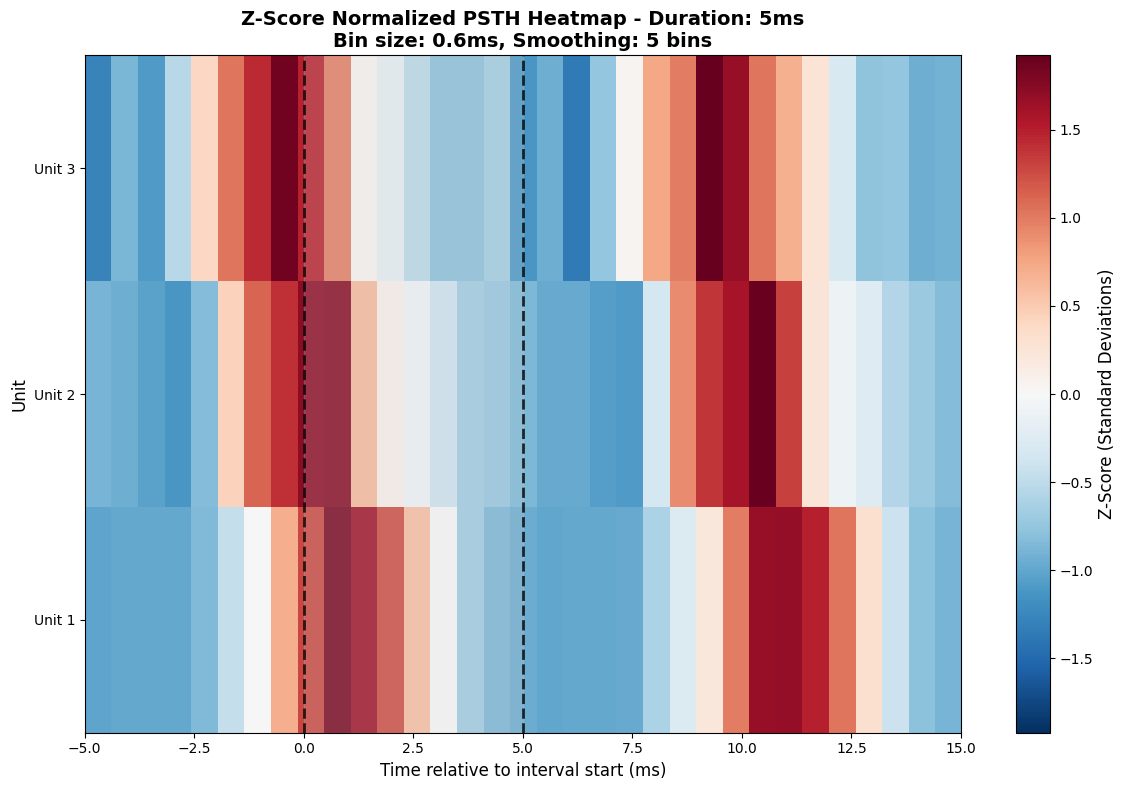

In [ ]:
# Test digital input functionality
print("=== Testing Digital Input Functionality ===")

# Check if the 040425 dataset has digitalin.dat file
test_digitalin_file = '../../../Data/040425/digitalin.dat'
if os.path.exists(test_digitalin_file):
    print(f"Found digitalin file: {test_digitalin_file}")
    
    # Test with the 040425 dataset
    test_spikes_file = '../../../Data/040425/spikes.csv'
    
    if os.path.exists(test_spikes_file):
        print("Running test with digital input loading...")
        
        # Test with a small subset for quick validation
        test_results = create_multiple_duration_normalized_heatmaps(
            spikes_file=os.path.abspath(test_spikes_file),
            digitalin_file=os.path.abspath(test_digitalin_file),
            durations_ms=[5],  # Just test one duration
            units=[1, 2, 3],   # Just test a few units
            bin_size_ms=0.6,
            pre_interval_ms=5,
            post_interval_ms=10,
            smooth_window=5,
            exclude_whisking=False,  # Disable whisking exclusion for basic test
            save_dir=None,  # Don't save during test
            sampling_rate=30000,
            pico_channel=0
        )
        
        if test_results and 5 in test_results and test_results[5][0] is not None:
            print("✓ Digital input test passed!")
            print(f"Generated heatmap from digitalin.dat file")
        else:
            print("✗ Digital input test failed - no results generated")
    else:
        print("Missing required spikes file for 040425 dataset")
else:
    print(f"Digital input file not found at {test_digitalin_file}")
    print("Digital input functionality cannot be tested with available data")